Iris Dataset:
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
X shape: (150, 4), y shape: (150,)

Data Splitting and Scaling Complete.



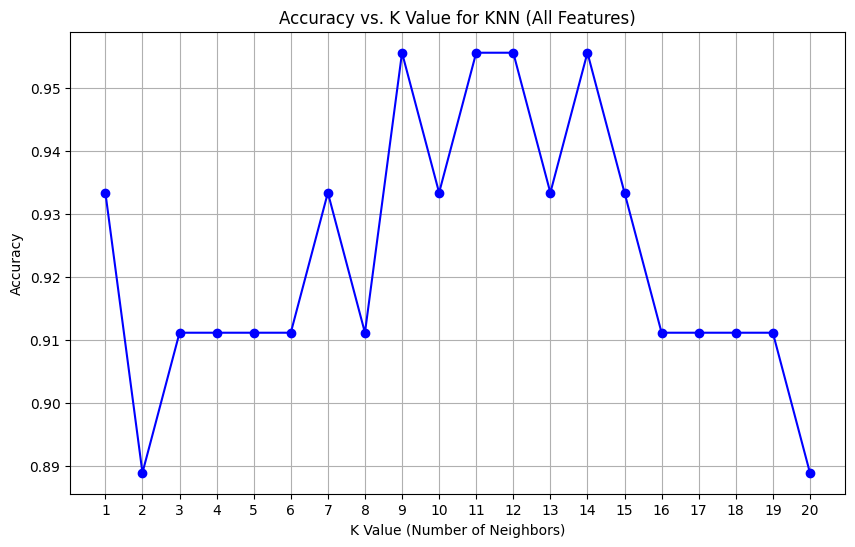


Chosen optimal K = 5

Accuracy with K=5 (All Features): 0.9111


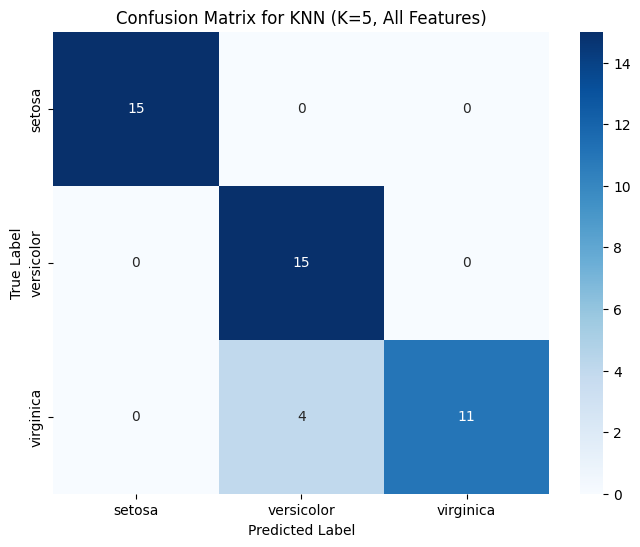


Classification Report for KNN (K=5, All Features):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45


Accuracy of KNN model with K=5 using only 2 features (petal length (cm), petal width (cm)): 0.9111



<ipython-input-4-ef27a9ca20d2>:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


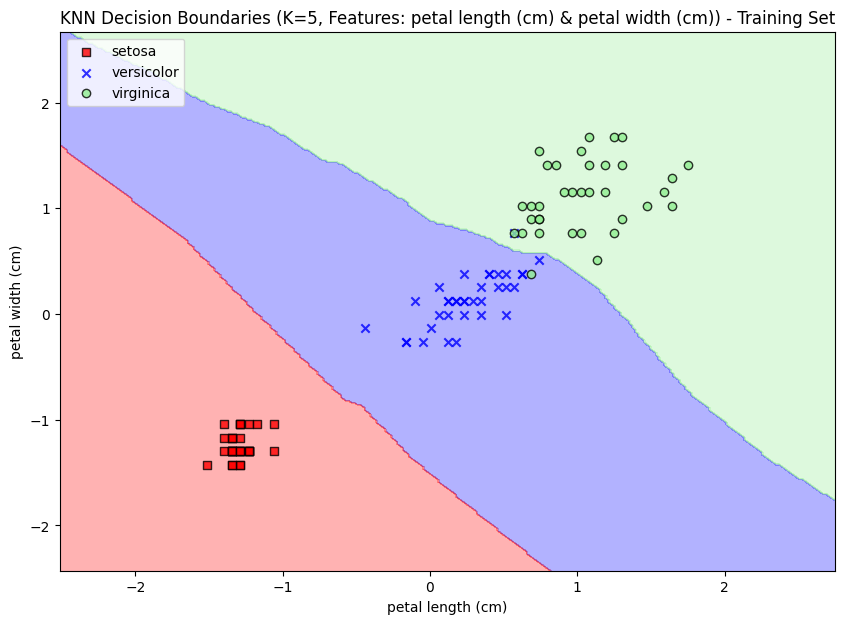

<ipython-input-4-ef27a9ca20d2>:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


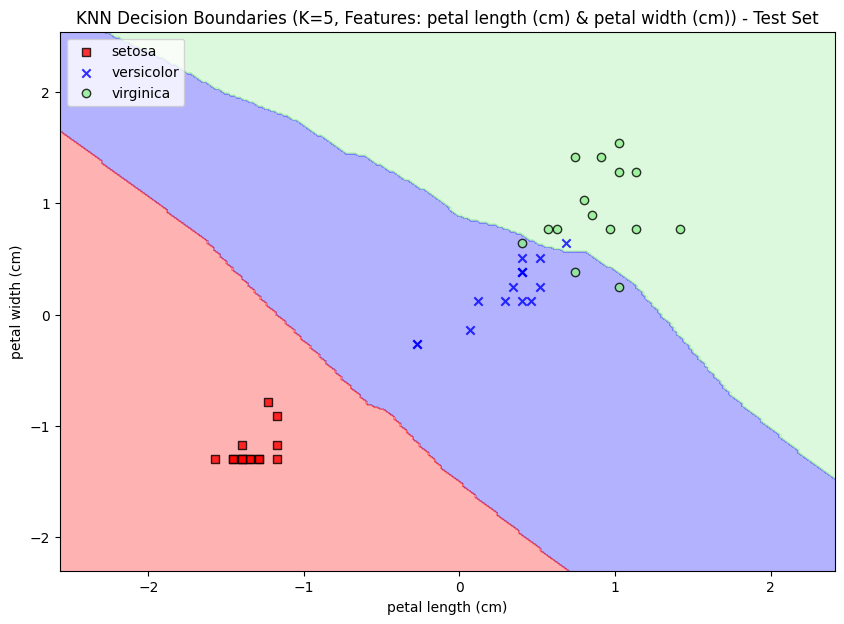

In [4]:

# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# Helper function to plot decision boundaries (for 2 features)
def plot_decision_boundaries(X, y, model, feature_names, class_names, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=class_names[cl],
                    edgecolor='black')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend(loc='upper left')
    plt.title('Decision Boundaries')

# --- Task 6: K-Nearest Neighbors (KNN) Classification ---

# 1. Choose a classification dataset and normalize features.
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names_all = iris.feature_names
class_names = iris.target_names

print("Iris Dataset:")
print(f"Features: {feature_names_all}")
print(f"Classes: {class_names}")
print(f"X shape: {X.shape}, y shape: {y.shape}\n")

# For simplicity in decision boundary visualization, we'll use only two features.
# Let's use Petal Length and Petal Width as they are generally good discriminators.
X_2_features = X[:, [2, 3]] # Petal length (index 2), Petal width (index 3)
feature_names_2 = [feature_names_all[2], feature_names_all[3]]

# Split data into training and testing sets (using all 4 features for initial model training)
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split data for 2-feature visualization model
X_train_2f, X_test_2f, y_train_2f, y_test_2f = train_test_split(X_2_features, y, test_size=0.3, random_state=42, stratify=y)


# Normalize features (scaling)
# It's important to fit the scaler on the training data ONLY and then transform both train and test data.
scaler_all = StandardScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)

scaler_2f = StandardScaler()
X_train_2f_scaled = scaler_2f.fit_transform(X_train_2f)
X_test_2f_scaled = scaler_2f.transform(X_test_2f)

print("Data Splitting and Scaling Complete.\n")

# 2. Use KNeighborsClassifier from sklearn.
# 3. Experiment with different values of K.
k_values = range(1, 21) # Test K from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_all_scaled, y_train)
    y_pred = knn.predict(X_test_all_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs. K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. K Value for KNN (All Features)')
plt.xlabel('K Value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Choose an optimal K (e.g., one that gives high accuracy, often looking for an "elbow" or stable high region)
# For this run, let's pick a K based on the plot, or a common good value like K=5 or K=7 if the plot is flat.
# Let's assume K=5 is a good choice based on common practice or the plot.
optimal_k = 5 # You might adjust this based on the plot above
print(f"\nChosen optimal K = {optimal_k}\n")

# 4. Evaluate model using accuracy, confusion matrix (with the chosen K).
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_all_scaled, y_train)
y_pred_optimal = knn_optimal.predict(X_test_all_scaled)

# Accuracy
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with K={optimal_k} (All Features): {accuracy_optimal:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix for KNN (K={optimal_k}, All Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print(f"\nClassification Report for KNN (K={optimal_k}, All Features):")
print(classification_report(y_test, y_pred_optimal, target_names=class_names))

# 5. Visualize decision boundaries (using the 2-feature model).
# Train a new KNN model using only the 2 selected features and the chosen optimal K
knn_visual = KNeighborsClassifier(n_neighbors=optimal_k)
knn_visual.fit(X_train_2f_scaled, y_train_2f) # Use scaled 2-feature training data

# Make predictions on the scaled 2-feature test set for evaluation of this 2-feature model
y_pred_2f_visual = knn_visual.predict(X_test_2f_scaled)
accuracy_2f_visual = accuracy_score(y_test_2f, y_pred_2f_visual)
print(f"\nAccuracy of KNN model with K={optimal_k} using only 2 features ({feature_names_2[0]}, {feature_names_2[1]}): {accuracy_2f_visual:.4f}\n")


# Plot decision boundaries for the 2-feature model using the training data for visualization
plt.figure(figsize=(10, 7))
# We plot boundaries using the scaled training data points
plot_decision_boundaries(X_train_2f_scaled, y_train_2f, knn_visual, feature_names_2, class_names)
plt.title(f'KNN Decision Boundaries (K={optimal_k}, Features: {feature_names_2[0]} & {feature_names_2[1]}) - Training Set')
plt.show()

# Optionally, plot decision boundaries with test data overlaid (on the same trained model)
plt.figure(figsize=(10, 7))
plot_decision_boundaries(X_test_2f_scaled, y_test_2f, knn_visual, feature_names_2, class_names)
plt.title(f'KNN Decision Boundaries (K={optimal_k}, Features: {feature_names_2[0]} & {feature_names_2[1]}) - Test Set')
plt.show()